# 3.8 통계적 가설검정

3.8~3.11절 통계적 가설검정

3.8.1 통계적가설검정$^{[1]}$

- 통계적가설검정은 표본을 사용해서 모집단에 관한 통계적인 판단을 내리는 방법입니다.


3.8.2 1변량 데이터의 t검정$^{[1]}$

- 대상 : 평균값

- 판단하는 것: 평균값이 어떤 값과 다른지 얘기할 수 있는지 여부


3.8.3 유의미한 차이

3.8.4 t검정: 직관전인 생각

3.8.5 평균값의 차이가 큰 것만으로는 유의미한 차이를 얻을 수 없다$^{[1]}$

- **평균값의 차이만으로는 유의미한 차이를 얻을 수 없다**는 것 입니다.

3.8.6 t값$^{[1]}$

3.8.7 통계적가설검정의 틀: 귀무가설, 대립가설

- 귀무가설: no difference

- 대립가설:

3.8.8 p값$^{[1]}$

- ***p*값**이란 표본과 귀무가설 간의 모순을 나타내는 지표입니다.

- *p*-value < 0.05 : no difference reject

3.8.9 유의수준$^{[1]}$

- ***p*값**이 유의수준을 밑돌면 귀무가설을 기각합니다. **유의수준**이란 귀무가설을 기각하는 기준이 되는 값이라고 생각할 수 있습니다.

3.8.10 t검정과 t분포의 관계

3.8.11 단측검정과 양측검정

$\mu$: 평균

$\mu_0$: 샘플값

검정의 기본 $H_0 : \mu = \mu_0$

- 단측검정: 우측검정 - $H_1 : \mu > \mu_0$, 좌측검정 - $H_1 : \mu < \mu_0$

- 양측검정 - $H_1 : \mu \not= \mu_0$

3.8.12 *p*값 계산 방법

3.8.13 t검정의 구현: 분석 준비

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [9]:
junk_food = pd.read_csv("../../data/3-8-1-junk-food-weight.csv")["weight"]
print(junk_food.head())

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64


귀무가설: 봉지과자의 평균중량은 50g이다.

대립가설: 봉지과자의 평균중량은 50g이 아니다.

유의수준: 5%

3.8.14 t검정의 구현: t값 계산

In [16]:
mu = np.mean(junk_food)
df = len(junk_food) - 1
sigma = np.std(junk_food, ddof=1)
se = sigma / np.sqrt(len(junk_food))

t_value = (mu - 50) / se

print(f"mu: {mu:.3f}, std: {sigma:.3f}, se: {se:.3f}")
print(f"t: {t_value:.3f}")

mu: 55.385, std: 8.756, se: 1.958
t: 2.750


3.8.15 t검정의 구현: *p*값 계산

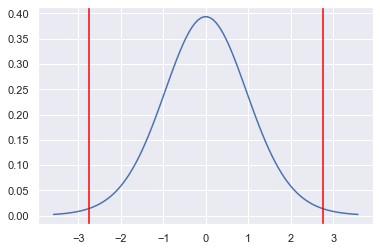

In [49]:
t_range = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)
plt.plot(t_range, stats.t.pdf(t_range, df), label='t pdf')
plt.axvline(x=t_value, color="red")
plt.axvline(x=-t_value, color="red")
# plt.plot([t_value, t_value], [0, 0.40], color='red')
# plt.plot([-t_value, -t_value], [0, 0.40], color='red')

In [30]:
# TODO: ???
alpha = stats.t.cdf(t_value, df=df)
print(f"p-value: {(1 - alpha) * 2:.3f}")

p-value: 0.013


In [50]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
# defualt : two-sided
print(stats.ttest_1samp(junk_food, 50))

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)


3.8.16 시뮬레이션에 의한 *p*값 계산

In [52]:
size = len(junk_food)
sigma = np.std(junk_food, ddof=1)

t_value_array = np.zeros(50000)

np.random.seed(1)
norm_dist = stats.norm(loc=50, scale=sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size=size)
    sample_mean = np.mean(sample)
    

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)